# Multiple LSTMs

In [17]:
#import paskages
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential , layers

Download and Prepare the Dataset


In [2]:
dataset , info = tfds.load('imdb_reviews/subwords8k' , with_info=True , as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMENHWW/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMENHWW/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMENHWW/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Get the tokenizer
tokenizer= info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

In [5]:
# Get the train and test splits
train_data , test_data = dataset['train'] , dataset['test']

In [6]:

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

In [7]:
# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

### Build and Compile the Model

In [8]:
# Hyperparameters
batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'lstm output units: {lstm_dim}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 16
lstm output units: 8


In [9]:
# Define array input with random values
random_input = np.random.rand(batch_size,timesteps,features)
print(f'shape of input array: {random_input.shape}')

shape of input array: (1, 20, 16)


In [10]:
#define LSTM that return a single layer
lstm = layers.LSTM(lstm_dim)

result = lstm(random_input)

print(f'shape of lstm output(return_sequences=False): {result.shape}')


shape of lstm output(return_sequences=False): (1, 8)


In [11]:
# Define LSTM that returns a sequence
lstm_rs = layers.LSTM(lstm_dim , return_sequences=True)
result = lstm_rs(random_input)
print(f'shape of lstm output(return_sequences=True): {result.shape}')

shape of lstm output(return_sequences=True): (1, 20, 8)


implements the stacked LSTM architecture.

In [12]:
# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

In [13]:
# Build the model
model  = tf.keras.Sequential([

    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim , return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),

    tf.keras.layers.Dense(dense_dim , activation='relu'),
    tf.keras.layers.Dense(1 ,activation='sigmoid')
])

In [14]:
#summary model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635329 (2.42 MB)
Trainable params: 635329 

In [15]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the Model

In [16]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 64s 564ms/step - loss: 0.5895 - accuracy: 0.6688 - val_loss: 0.4873 - val_accuracy: 0.7936
Epoch 2/10
98/98 [==============================] - 48s 491ms/step - loss: 0.3408 - accuracy: 0.8630 - val_loss: 0.3835 - val_accuracy: 0.8396
Epoch 3/10
98/98 [==============================] - 46s 470ms/step - loss: 0.2473 - accuracy: 0.9102 - val_loss: 0.3932 - val_accuracy: 0.8310
Epoch 4/10
98/98 [==============================] - 47s 480ms/step - loss: 0.1959 - accuracy: 0.9309 - val_loss: 0.3918 - val_accuracy: 0.8552
Epoch 5/10
98/98 [==============================] - 41s 418ms/step - loss: 0.1516 - accuracy: 0.9477 - val_loss: 0.4687 - val_accuracy: 0.8441
Epoch 6/10
98/98 [==============================] - 42s 426ms/step - loss: 0.1164 - accuracy: 0.9608 - val_loss: 0.4794 - val_accuracy: 0.8230
Epoch 7/10
98/98 [==============================] - 40s 407ms/step - loss: 0.0943 - accuracy: 0.9691 - val_loss: 0.5324 - val_accuracy: 0.8332

In [20]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


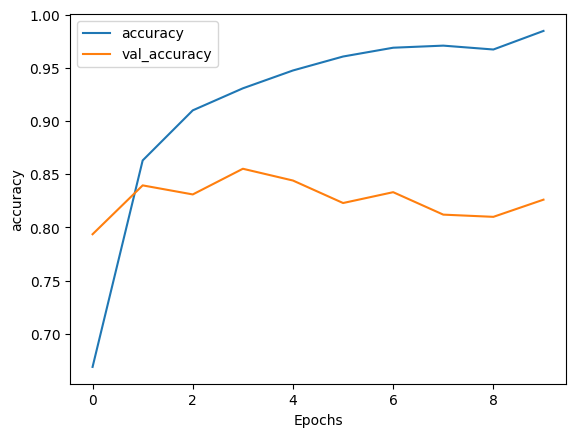

In [21]:
# Plot the accuracy and results
plot_graphs(history, "accuracy")

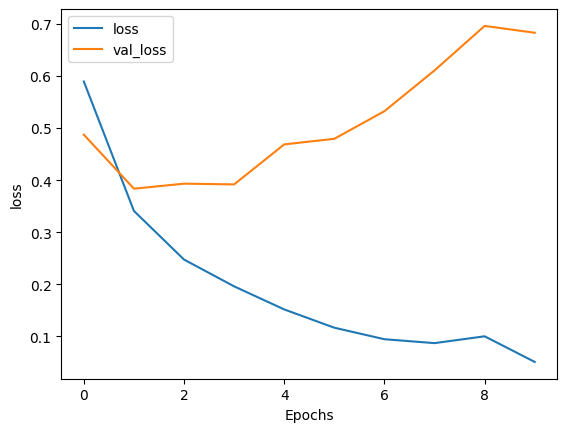

In [22]:
plot_graphs(history, "loss")